In [55]:
import numpy as np # diziler ve matrisler
import pandas as pd # veri analizi ve manipülasyonu 
import matplotlib.pyplot as plt #grafik çizimleri 
from sklearn import metrics #makine öğrenimi

import seaborn as sns # veri görselleştirme
import tensorflow as tf #derin öğrenme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import TensorBoard # new!  
import os 
import re # posta kodu bulma
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataset = pd.read_csv('alldata.csv', delimiter=",")
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40728 entries, 0 to 40727
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        40728 non-null  object 
 1   Price          40728 non-null  object 
 2   Property Type  40555 non-null  object 
 3   Bedrooms       39252 non-null  float64
 4   Bathrooms      39315 non-null  float64
 5   Size           40728 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.9+ MB


(40728, 6)

In [3]:
dataset.head()

,Address,Price,Property Type,Bedrooms,Bathrooms,Size
0,"Eloise House, Portland Road","£330,000",Apartment,1.0,1.0,518 sq ft
1,"Wimbledon Park Side, Putney","£340,000",Flat,1.0,1.0,Ask agent
2,"Rolfe Terrace, Woolwich, London","£340,000",Apartment,1.0,1.0,Ask agent
3,"Rectory Square, LONDON","£340,000",Flat,1.0,1.0,Ask agent
4,"Kingston Road, London, SW20","£340,000",Flat,1.0,1.0,388 sq ft


In [4]:
df = pd.DataFrame(dataset)
df

,Address,Price,Property Type,Bedrooms,Bathrooms,Size
0,"Eloise House, Portland Road","£330,000",Apartment,1.0,1.0,518 sq ft
1,"Wimbledon Park Side, Putney","£340,000",Flat,1.0,1.0,Ask agent
2,"Rolfe Terrace, Woolwich, London","£340,000",Apartment,1.0,1.0,Ask agent
3,"Rectory Square, LONDON","£340,000",Flat,1.0,1.0,Ask agent
4,"Kingston Road, London, SW20","£340,000",Flat,1.0,1.0,388 sq ft
...,...,...,...,...,...,...
40723,"Mapesbury, London, NW2","£5,950,000",Character Property,10.0,9.0,Ask agent
40724,"West Heath Close, Hampstead, NW3","£5,950,000",House,8.0,5.0,"5,198 sq ft"
40725,"Westmoreland Street, Marylebone, London W1","£5,950,000",Terraced,3.0,3.0,Ask agent
40726,"108 Lancaster Gate, Lancaster Gate","£5,950,000",Apartment,5.0,2.0,Ask agent


In [5]:
df.isnull().sum()  

Address             0
Price               0
Property Type     173
Bedrooms         1476
Bathrooms        1413
Size                0
dtype: int64

In [6]:
# 1. Tekrarlayan satırların varlığını kontrol et
has_duplicates = df.duplicated().any()

if has_duplicates:
    print("DataFrame içinde tekrarlayan veriler var.")
else:
    print("DataFrame içinde tekrarlayan veri yok.")

# 2. Tekrarlayan satırların sayısını bul
duplicate_count = df.duplicated().sum()
print(f"DataFrame içinde {duplicate_count} adet tekrarlayan satır var.")

# 3. Tekrarlayan satırları görmek için
duplicates = df[df.duplicated()]
print("Tekrarlayan Satırlar:")
print(duplicates)

# 4. Tekrarlayan satırları droplamak için
df = df.drop_duplicates()
print("Tekrarlayan satırlar silindi.")


DataFrame içinde tekrarlayan veriler var.
DataFrame içinde 781 adet tekrarlayan satır var.
Tekrarlayan Satırlar:
                                                 Address       Price  \
30                         Sherard Road, Eltham, SE9 6EX    £340,000   
423                           Putney High Street, Putney    £345,000   
640                                   The Avenue, Ealing    £350,000   
760                             Swan Mead, London Bridge    £350,000   
762                      Rotherhithe Street, Rotherhithe    £350,000   
...                                                  ...         ...   
31342          Meadowview Road, Raynes Park,\r\nSW20 9BD  £1,095,000   
31343          Meadowview Road, Raynes Park,\r\nSW20 9BD  £1,095,000   
31410  Lexington House, 10 - 14 Auriol Road, London, W14  £1,135,000   
31714          Windows On The River, \nCamille House, W4  £1,150,000   
31934                               Selvage Lane, London  £1,199,950   

       Property Type  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39947 entries, 0 to 40727
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        39947 non-null  object 
 1   Price          39947 non-null  object 
 2   Property Type  39774 non-null  object 
 3   Bedrooms       38503 non-null  float64
 4   Bathrooms      38595 non-null  float64
 5   Size           39947 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


In [8]:
df['Price'] = df['Price'].str.replace('£', '')
df.rename(columns={'Price': 'Price (£)'}, inplace=True)
# Sayısal olmayan değerleri görüntüleme
non_numeric_prices = df[~df['Price (£)'].str.replace(',', '').str.isdigit()]
df = df.drop(non_numeric_prices.index)
df['Price (£)'] = df['Price (£)'].str.replace(',', '').astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_277916\158524243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('£', '')
C:\Users\user\AppData\Local\Temp\ipykernel_277916\158524243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Price': 'Price (£)'}, inplace=True)


In [9]:
unique_types_property = df['Property Type'].unique()  # Benzersiz değerler
type_count_property = df['Property Type'].nunique()   # Benzersiz türlerin sayısı
print(unique_types_property)
print(type_count_property)

['Apartment' 'Flat' 'Maisonette' 'Retirement Property' 'Ground Flat'
 'House' 'Studio' 'Detached' 'Duplex' 'Semi-Detached' 'Terraced'
 'Ground Maisonette' 'End of Terrace' 'House Boat' 'Penthouse' nan 'Land'
 'Parking' 'Plot' 'Town House' 'Block of Apartments' 'Detached Bungalow'
 'Bungalow' 'Garages' 'Park Home' 'Lodge' 'Mobile Home'
 'Link Detached House' 'Serviced Apartments' 'Mews'
 'Semi-Detached Bungalow' 'Cottage' 'Character Property' 'Off-Plan'
 'House of Multiple Occupation' 'Triplex' 'Barn Conversion' 'House Share'
 'Coach House' 'Villa' 'Equestrian Facility']
40


In [10]:
# Her property type için kaç tane veri olduğunu bul
property_counts = df['Property Type'].value_counts()

# Toplam veri sayısını al
total_data_count = len(df)

# Sadece verilen property_types'ı al
filtered_counts = property_counts[property_counts.index.isin(unique_types_property)]

# Yüzdelik oranını hesapla
percentages = (filtered_counts / total_data_count) * 100

# Sonuçları bir DataFrame olarak birleştir ve sıralı göster
result = pd.DataFrame({
    'Count': filtered_counts,
    'Percentage (%)': percentages
}).sort_values(by='Count', ascending=False)

# Sonuçları yazdır
print(result)

                              Count  Percentage (%)
Property Type                                      
Flat                          15602       39.059684
Apartment                     12778       31.989786
Terraced                       3101        7.763369
Semi-Detached                  1710        4.280993
House                          1424        3.564991
Maisonette                     1060        2.653715
Detached                        873        2.185560
End of Terrace                  827        2.070399
Studio                          590        1.477068
Penthouse                       440        1.101542
Ground Flat                     271        0.678450
Duplex                          182        0.455638
Retirement Property             176        0.440617
Town House                      159        0.398057
Mews                            132        0.330463
Block of Apartments              56        0.140196
Bungalow                         53        0.132686
House Boat  

In [11]:
# %9'un altındaki property types'ı belirle
below_threshold = percentages[percentages < 9].index

# Bu property types'a sahip verileri düşür
df = df[~df['Property Type'].isin(below_threshold)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28551 entries, 0 to 40726
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        28551 non-null  object 
 1   Price (£)      28551 non-null  int32  
 2   Property Type  28380 non-null  object 
 3   Bedrooms       27893 non-null  float64
 4   Bathrooms      27675 non-null  float64
 5   Size           28551 non-null  object 
dtypes: float64(2), int32(1), object(3)
memory usage: 1.4+ MB


In [12]:
df['Property Type'] = df['Property Type'].fillna('Unknown')

In [13]:
df['Size'] = df['Size'].str.replace('sq ft', '', regex=False)  # 'sq ft' kaldırılır
df['Size'] = df['Size'].str.replace(',', '', regex=False)  # Virgül kaldırılır
df['Size'] = pd.to_numeric(df['Size'], errors='coerce').fillna(0).astype(int)
df

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size
0,"Eloise House, Portland Road",330000,Apartment,1.0,1.0,518
1,"Wimbledon Park Side, Putney",340000,Flat,1.0,1.0,0
2,"Rolfe Terrace, Woolwich, London",340000,Apartment,1.0,1.0,0
3,"Rectory Square, LONDON",340000,Flat,1.0,1.0,0
4,"Kingston Road, London, SW20",340000,Flat,1.0,1.0,388
...,...,...,...,...,...,...
40713,"Bayswater Road, Bayswater, Elie Saab Residence...",5950000,Flat,3.0,3.0,2106
40718,"The Lansbury, Knightsbridge, London, SW3 1BA",5950000,Flat,3.0,4.0,2845
40721,"Riverside One, Hester Road, Battersea, London,...",5950000,Apartment,5.0,4.0,3861
40722,"Basil Mansions, Basil Street, Knightsbridge, L...",5950000,Flat,3.0,3.0,2437


In [14]:
zero_count = (df['Size'] == 0).sum()
zero_count

12627

In [15]:
df.drop(df[df['Size'] == 0].index, inplace=True)
df

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size
0,"Eloise House, Portland Road",330000,Apartment,1.0,1.0,518
4,"Kingston Road, London, SW20",340000,Flat,1.0,1.0,388
5,"Witley Court, Coram Street, Bloomsbury, London...",340000,Apartment,NaN,1.0,230
6,"Parish Lane, London",340000,Flat,1.0,1.0,465
8,"Blackwell Close, London",340000,Flat,2.0,2.0,665
...,...,...,...,...,...,...
40711,"Blenheim Court, \r\n108 Lancaster Gate, W2",5950000,Flat,5.0,2.0,3157
40713,"Bayswater Road, Bayswater, Elie Saab Residence...",5950000,Flat,3.0,3.0,2106
40718,"The Lansbury, Knightsbridge, London, SW3 1BA",5950000,Flat,3.0,4.0,2845
40721,"Riverside One, Hester Road, Battersea, London,...",5950000,Apartment,5.0,4.0,3861


In [16]:
df['Bedrooms'] = df['Bedrooms'].fillna("Unknown")
zero_count_bedrooms = (df['Bedrooms'] == "Unknown").sum()
zero_count_bedrooms

358

In [17]:
df[df['Bedrooms']=="Unknown"]

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size
5,"Witley Court, Coram Street, Bloomsbury, London...",340000,Apartment,Unknown,1.0,230
79,"Apartment , River Apartments, Gillender Stree...",340000,Apartment,Unknown,1.0,420
144,"Gillender Street, Bromley, E3 3JY",336000,Apartment,Unknown,1.0,438
196,"Red Lion Square, Wandsworth, London, SW18",335000,Apartment,Unknown,1.0,421
299,"12 Baltimore Wharf, Canary Wharf, London, E14",330000,Flat,Unknown,1.0,340
...,...,...,...,...,...,...
38851,"Astrale House, 13 Nether Street. North Finchle...",5250000,Unknown,Unknown,NaN,11162
38852,"10-14 Hollybush Gardens, London, Bethnal Green",5250000,Unknown,Unknown,NaN,16694
40041,"Clandon House, Clandon Gardens, London",10000000,Unknown,Unknown,NaN,20114
40619,"Sovereign House, 361 King Street, Hammersmith,...",6250000,Unknown,Unknown,NaN,17157


In [18]:
df['Bathrooms'] = df['Bathrooms'].fillna('Unknown')
zero_count_bathrooms = (df['Bathrooms'] == "Unknown").sum()
zero_count_bathrooms

303

In [19]:
df[df['Bathrooms']=="Unknown"]

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size
185,"Kirchen Road, Ealing, London, W13",335000,Flat,1.0,Unknown,566
510,"Roma Corte, Lewisham, London, SE13",350000,Flat,1.0,Unknown,518
884,"Wellesley Road, Kentish Town, NW5",350000,Apartment,1.0,Unknown,366
992,"Pancras Way, E3, Bow, London, E3",350000,Flat,1.0,Unknown,622
1095,"Kensington Church Street, Notting Hill, W8",350000,Flat,Unknown,Unknown,355
...,...,...,...,...,...,...
39770,Princes Gate,18500000,Apartment,5.0,Unknown,7187
39776,"Hill Street, Mayfair, London, W1J",6475000,Apartment,3.0,Unknown,2166
40041,"Clandon House, Clandon Gardens, London",10000000,Unknown,Unknown,Unknown,20114
40619,"Sovereign House, 361 King Street, Hammersmith,...",6250000,Unknown,Unknown,Unknown,17157


In [20]:
df.drop(df[df['Bedrooms'] == "Unknown"].index, inplace=True)
df.drop(df[df['Bathrooms'] == "Unknown"].index, inplace=True)
df.drop(df[df['Property Type'] == "Unknown"].index, inplace=True)
df

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size
0,"Eloise House, Portland Road",330000,Apartment,1.0,1.0,518
4,"Kingston Road, London, SW20",340000,Flat,1.0,1.0,388
6,"Parish Lane, London",340000,Flat,1.0,1.0,465
8,"Blackwell Close, London",340000,Flat,2.0,2.0,665
13,"Woodlands Grove, Isleworth",340000,Apartment,2.0,1.0,680
...,...,...,...,...,...,...
40711,"Blenheim Court, \r\n108 Lancaster Gate, W2",5950000,Flat,5.0,2.0,3157
40713,"Bayswater Road, Bayswater, Elie Saab Residence...",5950000,Flat,3.0,3.0,2106
40718,"The Lansbury, Knightsbridge, London, SW3 1BA",5950000,Flat,3.0,4.0,2845
40721,"Riverside One, Hester Road, Battersea, London,...",5950000,Apartment,5.0,4.0,3861


In [21]:
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [22]:
df

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size
0,"Eloise House, Portland Road",330000,Apartment,1,1,518
4,"Kingston Road, London, SW20",340000,Flat,1,1,388
6,"Parish Lane, London",340000,Flat,1,1,465
8,"Blackwell Close, London",340000,Flat,2,2,665
13,"Woodlands Grove, Isleworth",340000,Apartment,2,1,680
...,...,...,...,...,...,...
40711,"Blenheim Court, \r\n108 Lancaster Gate, W2",5950000,Flat,5,2,3157
40713,"Bayswater Road, Bayswater, Elie Saab Residence...",5950000,Flat,3,3,2106
40718,"The Lansbury, Knightsbridge, London, SW3 1BA",5950000,Flat,3,4,2845
40721,"Riverside One, Hester Road, Battersea, London,...",5950000,Apartment,5,4,3861


luxury_weights = {
    "Kensington": 100, "Chelsea": 99, "Mayfair": 98, "Notting Hill": 97,
    "Westminster": 96, "Islington": 95, "Wandsworth": 94, "Wimbledon": 93,
    "Greenwich": 92, "Barking ve Dagenham": 10, "Bromley": 30, "Barnet": 50, 
    "Bexley": 15, "Brent": 35, "Hammersmith ve Fulham": 80, "Hackney": 85, 
    "Camden": 90, "Richmond upon Thames": 75, "Tower Hamlets": 70, 
    "Haringey": 60, "Hounslow": 40, "Lambeth": 65, "Merton": 55, "Croydon": 25, 
    "Hillingdon": 20, "Enfield": 45, "Ealing": 50, "Lewisham": 60, 
    "Kingston upon Thames": 65, "Southwark": 60, "Redbridge": 50, 
    "Hackney": 85, "Sutton": 30, "Brentwood": 25, "Barnes": 90, 
    "Ilford": 35, "Waltham Forest": 50, "Wandsworth": 94, "Dulwich": 85, 
    "Stoke Newington": 75, "Putney": 80,
    # Yeni eklenen mahalleler
    "Barking": 10, "Dagenham": 10, "Chadwell Heath": 20, "Becontree": 15,
    "Rush Green": 20, "High Barnet": 45, "East Barnet": 45, "Finchley": 50,
    "Hendon": 40, "Bexleyheath": 20, "Sidcup": 25, "Welling": 20, "Erith": 10,
    "Belvedere": 15, "Wembley": 50, "Kilburn": 60, "Harlesden": 35, "Willesden": 50,
    "Brondesbury": 60, "Orpington": 30, "Beckenham": 45, "Penge": 30,
    "Chislehurst": 40, "Hampstead": 95, "Belsize Park": 90, "Hampstead": 95,
    "Kentish Town": 80, "Brixton": 60, "Clapham": 70, "Stockwell": 50,
    "Kennington": 75, "Oval": 65, "Lewisham": 60, "Catford": 30, "Forest Hill": 50,
    "Deptford": 40, "Brockley": 50, "Mitcham": 30, "Raynes Park": 60,
    "Colliers Wood": 40, "South Wimbledon": 50, "Stratford": 75, "Canning Town": 60,
    "East Ham": 40, "Forest Gate": 30, "Beckton": 25, "Twickenham": 70,
    "Kew": 80, "Barnes": 90, "Ham": 35, "Southwark": 60, "Bermondsey": 60,
    "Peckham": 50, "Dulwich": 85, "Camberwell": 55, "Carshalton": 40,
    "Cheam": 45, "Wallington": 50, "Hackbridge": 35, "Tottenham": 60,
    "Wood Green": 60, "Crouch End": 75, "Hornsey": 60, "Highgate": 90,
    "Uxbridge": 40, "Hayes": 35, "Ruislip": 40, "West Drayton": 35,
    "Northwood": 55, "Hounslow": 40, "Brentford": 50, "Isleworth": 55,
    "Feltham": 25, "Chiswick": 85, "Islington": 90, "Angel": 80,
    "Finsbury Park": 85, "Canonbury": 75, "Walthamstow": 50, "Leyton": 45,
    "Chingford": 40, "Highams Park": 35, "Wood Street": 30, "Putney": 80,
    "Balham": 60, "Battersea": 75, "Tooting": 50, "Clapham Junction": 70,
    "Mayfair": 98, "Soho": 90, "Paddington": 85, "Marylebone": 95,
    "Bayswater": 80,
    # Eksik mahalleler
    "Kingston Vale": 65, "Morden": 40, "Sutton": 30, "South Norwood": 25,
    "Walthamstow": 50, "Tottenham Hale": 55, "Upper Holloway": 70, "Sydenham": 40
}




df['Luxury'] = 0  # Varsayılan olarak 0 ağırlık

# Mahalle kontrolü ve ağırlık ekleme
for index, row in df.iterrows():
    # Adresi virgülle ayır ve parts'ları oluştur
    address_parts = row['Address'].split(',')
    
    for mahalle, ağırlık in luxury_weights.items():
        # Adres parçalarındaki her bir kısmı kontrol et ve yalnızca tam eşleşme sağla
        if any(part.strip() == mahalle for part in address_parts):
            df.at[index, 'Luxury'] = ağırlık
            break  # İlk eşleşmeyi bulunca dur
        else:
            df.at[index, 'Luxury'] = 74

In [23]:
# Posta kodlarını adres sütunundan çıkarma
def extract_postcode(address):
    match = re.search(r'\b[0-9A-Z]+\b', address)
    return match.group(0) if match else None

# Yeni bir sütun oluşturmak için apply ve lambda kullanımı
df['Postcode'] = df['Address'].apply(lambda address: extract_postcode(address.split(',')[-1].strip()))


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15248 entries, 0 to 40722
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        15248 non-null  object
 1   Price (£)      15248 non-null  int32 
 2   Property Type  15248 non-null  object
 3   Bedrooms       15248 non-null  int32 
 4   Bathrooms      15248 non-null  int32 
 5   Size           15248 non-null  int32 
 6   Postcode       13214 non-null  object
dtypes: int32(4), object(3)
memory usage: 714.8+ KB


In [25]:
# Posta koduna göre sınıflandırma
def classify_region(postcode):
    if not postcode:  # Eğer boşsa NaN döndür
        return None
    region = postcode[:2]  # Posta kodunun ilk iki karakteri
    if region.startswith('E') and not region.startswith('EC'):  # E ancak EC değilse
        return 'East'
    elif region.startswith('EC'):
        return 'East Central'
    elif region.startswith('WC'):
        return 'West Central'
    elif region.startswith('N') and not region.startswith('NW'):
        return 'North'
    elif region.startswith('NW'):
        return 'North West'
    elif region.startswith('SE'):
        return 'South East'
    elif region.startswith('SW'):
        return 'South West'
    elif region.startswith('W') and not region.startswith('WC'):
        return 'West'
    else:
        return 'Unknown'

# Lükslük derecesi belirleme
def luxury_score(region):
    luxury_mapping = {
        'West Central': 5,    # Çok Yüksek
        'West': 4,            # Yüksek
        'East Central': 4,    # Yüksek
        'South West': 3,      # Orta-Yüksek
        'North West': 3,      # Orta-Yüksek
        'North': 2,           # Orta
        'South East': 2,      # Orta
        'East': 1             # Düşük
    }
    return luxury_mapping.get(region, 0)  # Bilinmeyen bölgelere 0

# Posta kodlarını sınıflandır ve lükslük derecesi sütununu ekle
df['Region'] = df['Postcode'].apply(classify_region)
df['Luxury_Score'] = df['Region'].apply(luxury_score)

df


,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size,Postcode,Region,Luxury_Score
0,"Eloise House, Portland Road",330000,Apartment,1,1,518,None,None,0
4,"Kingston Road, London, SW20",340000,Flat,1,1,388,SW20,South West,3
6,"Parish Lane, London",340000,Flat,1,1,465,None,None,0
8,"Blackwell Close, London",340000,Flat,2,2,665,None,None,0
13,"Woodlands Grove, Isleworth",340000,Apartment,2,1,680,None,None,0
...,...,...,...,...,...,...,...,...,...
40711,"Blenheim Court, \r\n108 Lancaster Gate, W2",5950000,Flat,5,2,3157,W2,West,4
40713,"Bayswater Road, Bayswater, Elie Saab Residence...",5950000,Flat,3,3,2106,None,None,0
40718,"The Lansbury, Knightsbridge, London, SW3 1BA",5950000,Flat,3,4,2845,SW3,South West,3
40721,"Riverside One, Hester Road, Battersea, London,...",5950000,Apartment,5,4,3861,SW11,South West,3


In [26]:
(df['Luxury_Score'] == 0).sum()

2378

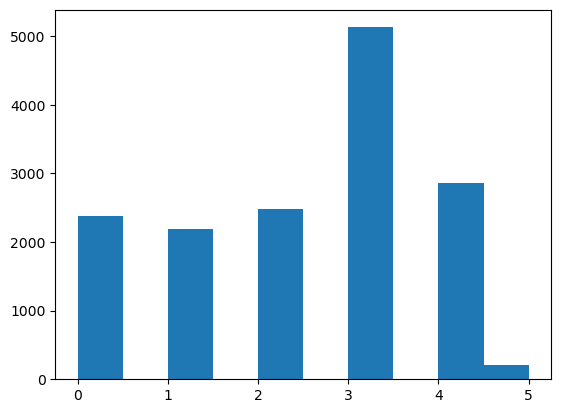

In [27]:
plt.hist(df['Luxury_Score']) 
plt.show()

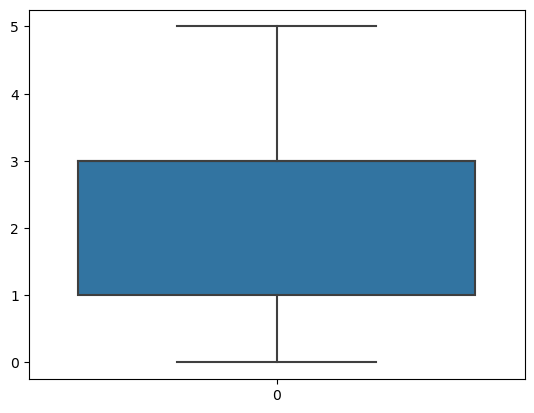

In [28]:
sns.boxplot(df['Luxury_Score'])
plt.show()

In [29]:
# Ortalama luxury score'u hesapla
average_luxury_score = df['Luxury_Score'][df['Luxury_Score'] > 0].mean()

#df.drop(df[df['Luxury_Score'] == 0].index, inplace=True)
# Luxury_Score'u 0 olan satırları ortalama değer ile doldur
df.loc[df['Luxury_Score'] == 0, 'Luxury_Score'] = average_luxury_score

In [30]:
df

,Address,Price (£),Property Type,Bedrooms,Bathrooms,Size,Postcode,Region,Luxury_Score
0,"Eloise House, Portland Road",330000,Apartment,1,1,518,None,None,2.719503
4,"Kingston Road, London, SW20",340000,Flat,1,1,388,SW20,South West,3.000000
6,"Parish Lane, London",340000,Flat,1,1,465,None,None,2.719503
8,"Blackwell Close, London",340000,Flat,2,2,665,None,None,2.719503
13,"Woodlands Grove, Isleworth",340000,Apartment,2,1,680,None,None,2.719503
...,...,...,...,...,...,...,...,...,...
40711,"Blenheim Court, \r\n108 Lancaster Gate, W2",5950000,Flat,5,2,3157,W2,West,4.000000
40713,"Bayswater Road, Bayswater, Elie Saab Residence...",5950000,Flat,3,3,2106,None,None,2.719503
40718,"The Lansbury, Knightsbridge, London, SW3 1BA",5950000,Flat,3,4,2845,SW3,South West,3.000000
40721,"Riverside One, Hester Road, Battersea, London,...",5950000,Apartment,5,4,3861,SW11,South West,3.000000


In [31]:
type_encoded = pd.get_dummies(df, columns=['Property Type'])
df=pd.concat([type_encoded],axis=1)
df.head()

,Address,Price (£),Bedrooms,Bathrooms,Size,Postcode,Region,Luxury_Score,Property Type_Apartment,Property Type_Flat
0,"Eloise House, Portland Road",330000,1,1,518,None,None,2.719503,True,False
4,"Kingston Road, London, SW20",340000,1,1,388,SW20,South West,3.000000,False,True
6,"Parish Lane, London",340000,1,1,465,None,None,2.719503,False,True
8,"Blackwell Close, London",340000,2,2,665,None,None,2.719503,False,True
13,"Woodlands Grove, Isleworth",340000,2,1,680,None,None,2.719503,True,False


In [32]:
# Sütun adlarını temizle (başındaki/sonundaki boşlukları kaldır)
df.columns = df.columns.str.strip()
df = df.drop(columns=['Address'])
df = df.drop(columns=["Region"])
df = df.drop(columns=["Postcode"])

In [33]:
df.columns

Index(['Price (£)', 'Bedrooms', 'Bathrooms', 'Size', 'Luxury_Score',
       'Property Type_Apartment', 'Property Type_Flat'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15248 entries, 0 to 40722
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price (£)                15248 non-null  int32  
 1   Bedrooms                 15248 non-null  int32  
 2   Bathrooms                15248 non-null  int32  
 3   Size                     15248 non-null  int32  
 4   Luxury_Score             15248 non-null  float64
 5   Property Type_Apartment  15248 non-null  bool   
 6   Property Type_Flat       15248 non-null  bool   
dtypes: bool(2), float64(1), int32(4)
memory usage: 1022.3 KB


In [35]:
df

,Price (£),Bedrooms,Bathrooms,Size,Luxury_Score,Property Type_Apartment,Property Type_Flat
0,330000,1,1,518,2.719503,True,False
4,340000,1,1,388,3.000000,False,True
6,340000,1,1,465,2.719503,False,True
8,340000,2,2,665,2.719503,False,True
13,340000,2,1,680,2.719503,True,False
...,...,...,...,...,...,...,...
40711,5950000,5,2,3157,4.000000,False,True
40713,5950000,3,3,2106,2.719503,False,True
40718,5950000,3,4,2845,3.000000,False,True
40721,5950000,5,4,3861,3.000000,True,False


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


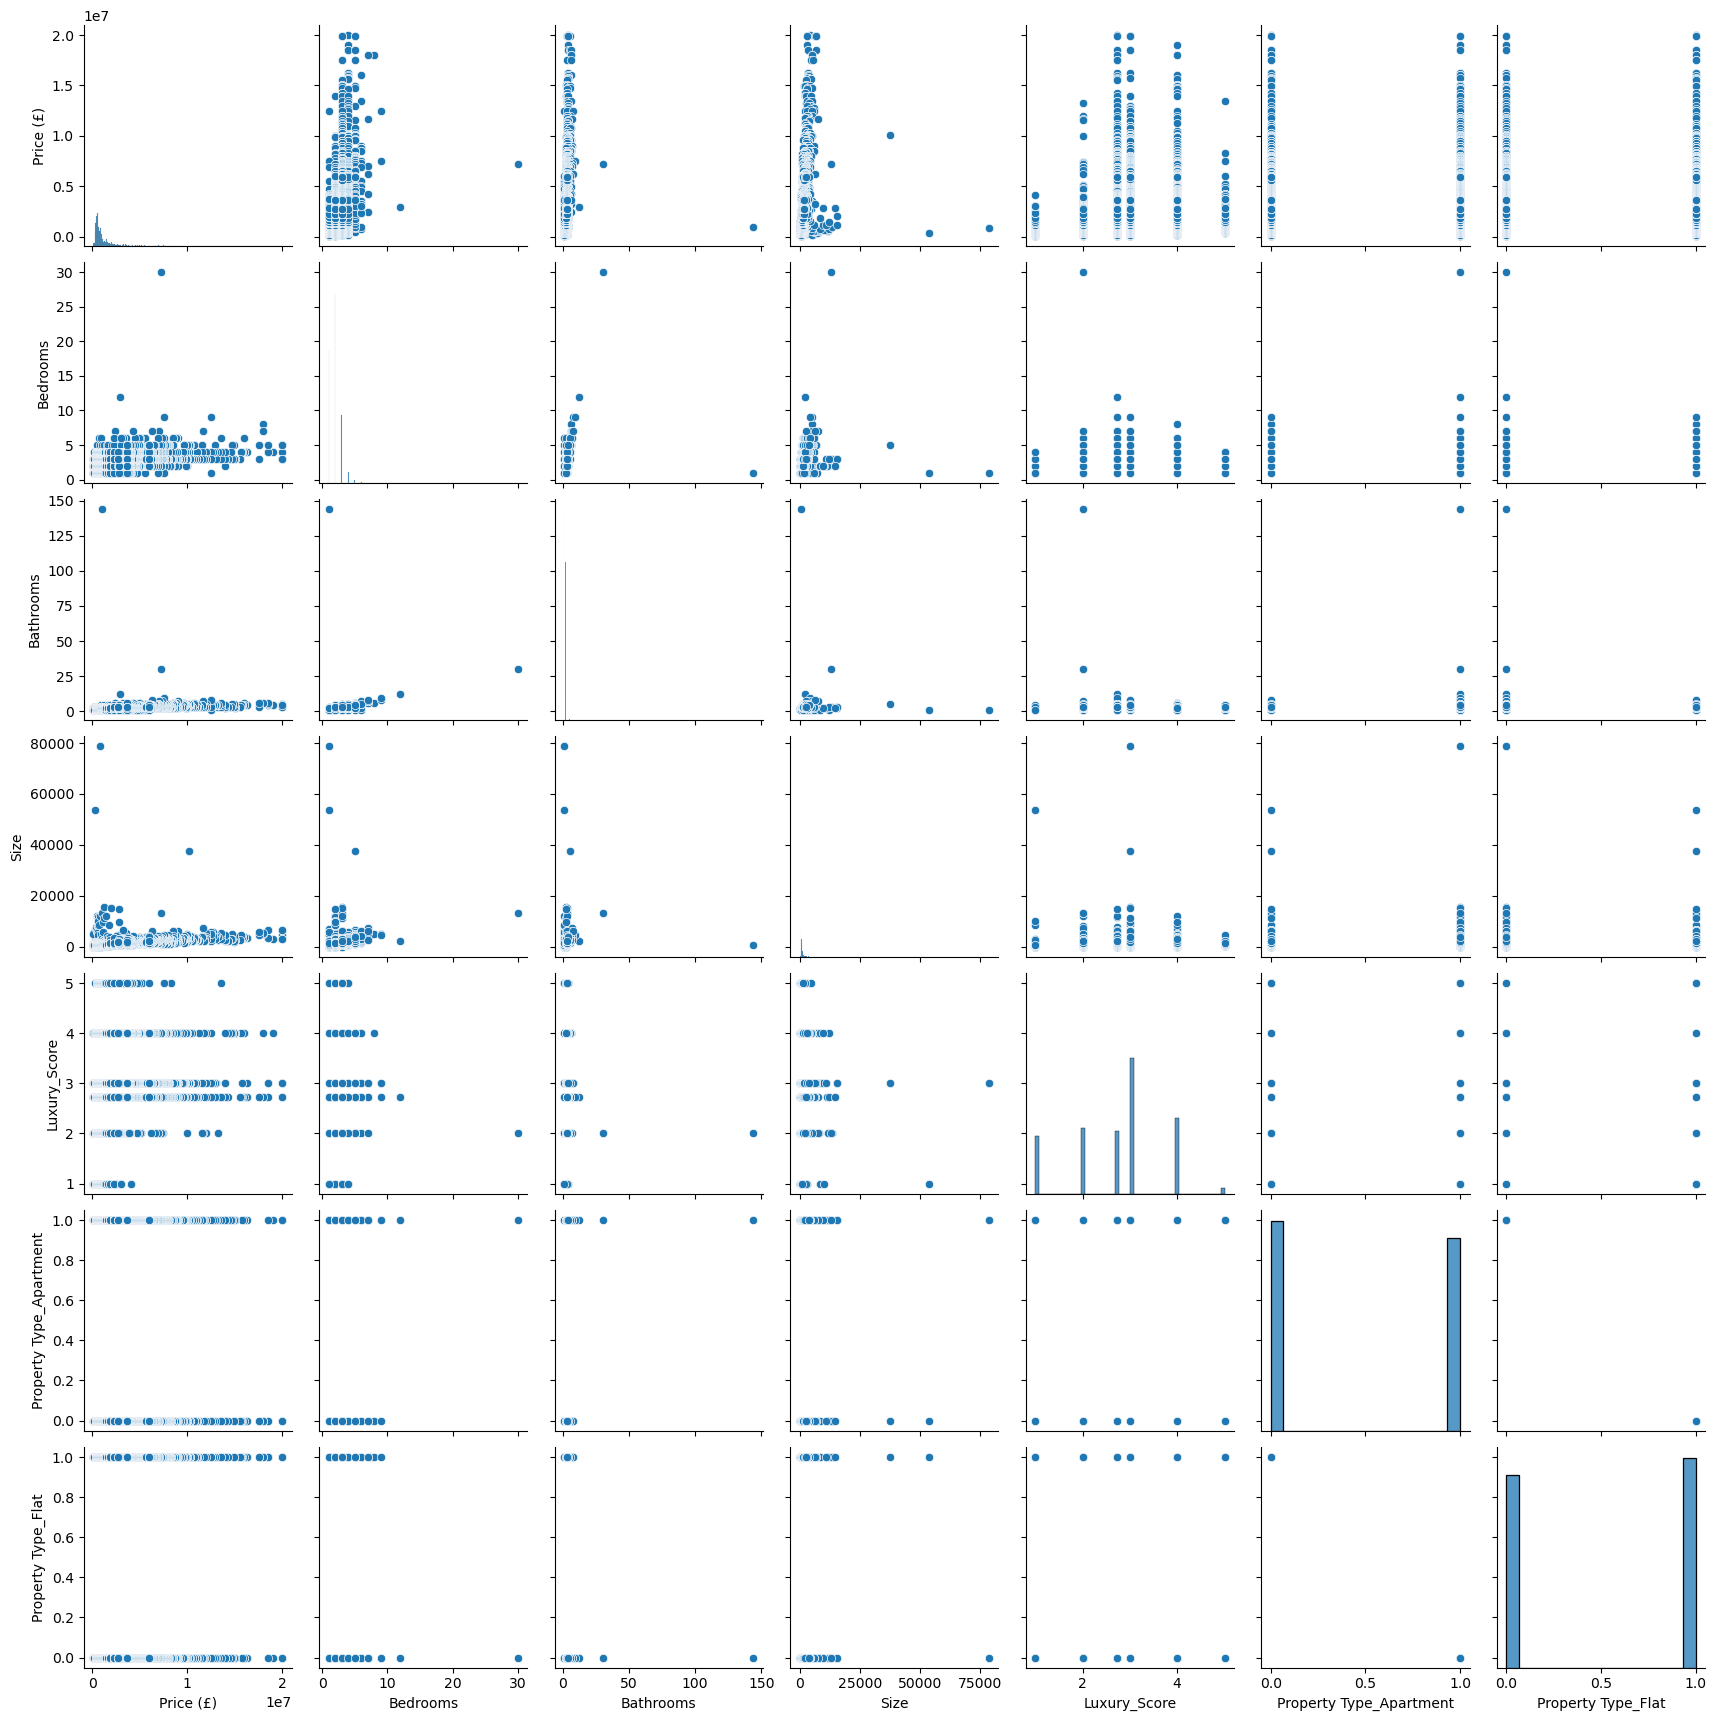

In [36]:
sns.pairplot(df)
plt.show()

In [37]:
y = df["Price (£)"].values
x = df.drop(["Price (£)"], axis=1).values

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [39]:
scaler = MinMaxScaler()


In [40]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
x_train.shape

(12198, 6)

In [42]:
model = Sequential()

model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))

model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))

model.add(Dense(16,activation="relu"))

model.add(Dense(8,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [43]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=128,epochs=700)

Epoch 1/700

96/96 [==============================] - 1s 2ms/step - loss: 3897921634304.0000 - val_loss: 3609210912768.0000
Epoch 2/700
96/96 [==============================] - 0s 1ms/step - loss: 3386606092288.0000 - val_loss: 2204108324864.0000
Epoch 3/700
96/96 [==============================] - 0s 1ms/step - loss: 2399812190208.0000 - val_loss: 2174488805376.0000
Epoch 4/700
96/96 [==============================] - 0s 1ms/step - loss: 2364842967040.0000 - val_loss: 2151680966656.0000
Epoch 5/700
96/96 [==============================] - 0s 1ms/step - loss: 2333882974208.0000 - val_loss: 2121642541056.0000
Epoch 6/700
96/96 [==============================] - 0s 1ms/step - loss: 2295347806208.0000 - val_loss: 2092798836736.0000
Epoch 7/700
96/96 [==============================] - 0s 1ms/step - loss: 2253235945472.0000 - val_loss: 2057699065856.0000
Epoch 8/700
96/96 [==============================] - 0s 1ms/step - loss: 2190355726336.0000 - val_loss: 2034124980224.0000
Epoch 9/700
96/

96/96 [==============================] - 0s 1ms/step - loss: 1389613547520.0000 - val_loss: 6442992533504.0000
Epoch 66/700
96/96 [==============================] - 0s 1ms/step - loss: 1391785017344.0000 - val_loss: 6429689249792.0000
Epoch 67/700
96/96 [==============================] - 0s 1ms/step - loss: 1391611478016.0000 - val_loss: 6443323359232.0000
Epoch 68/700
96/96 [==============================] - 0s 1ms/step - loss: 1392937402368.0000 - val_loss: 6541838123008.0000
Epoch 69/700
96/96 [==============================] - 0s 1ms/step - loss: 1388678479872.0000 - val_loss: 6655339134976.0000
Epoch 70/700
96/96 [==============================] - 0s 1ms/step - loss: 1389528743936.0000 - val_loss: 7118879457280.0000
Epoch 71/700
96/96 [==============================] - 0s 1ms/step - loss: 1391063465984.0000 - val_loss: 6573785612288.0000
Epoch 72/700
96/96 [==============================] - 0s 1ms/step - loss: 1393486987264.0000 - val_loss: 6666370678784.0000
Epoch 73/700
96/96 [=

Epoch 131/700
96/96 [==============================] - 0s 1ms/step - loss: 1347346628608.0000 - val_loss: 7383788552192.0000
Epoch 132/700
96/96 [==============================] - 0s 1ms/step - loss: 1335234920448.0000 - val_loss: 7445274427392.0000
Epoch 133/700
96/96 [==============================] - 0s 1ms/step - loss: 1332949286912.0000 - val_loss: 7631063220224.0000
Epoch 134/700
96/96 [==============================] - 0s 1ms/step - loss: 1323893260288.0000 - val_loss: 7555681615872.0000
Epoch 135/700
96/96 [==============================] - 0s 1ms/step - loss: 1320326004736.0000 - val_loss: 8032530464768.0000
Epoch 136/700
96/96 [==============================] - 0s 1ms/step - loss: 1313370013696.0000 - val_loss: 7197068099584.0000
Epoch 137/700
96/96 [==============================] - 0s 1ms/step - loss: 1309524885504.0000 - val_loss: 7199271157760.0000
Epoch 138/700
96/96 [==============================] - 0s 1ms/step - loss: 1314143862784.0000 - val_loss: 7678923374592.0000


96/96 [==============================] - 0s 1ms/step - loss: 1135167668224.0000 - val_loss: 3854303756288.0000
Epoch 197/700
96/96 [==============================] - 0s 1ms/step - loss: 1129445720064.0000 - val_loss: 3536268296192.0000
Epoch 198/700
96/96 [==============================] - 0s 1ms/step - loss: 1129842868224.0000 - val_loss: 3658655989760.0000
Epoch 199/700
96/96 [==============================] - 0s 1ms/step - loss: 1125888032768.0000 - val_loss: 3458686779392.0000
Epoch 200/700
96/96 [==============================] - 0s 1ms/step - loss: 1121234845696.0000 - val_loss: 3460631625728.0000
Epoch 201/700
96/96 [==============================] - 0s 1ms/step - loss: 1124683350016.0000 - val_loss: 3367156842496.0000
Epoch 202/700
96/96 [==============================] - 0s 1ms/step - loss: 1116753494016.0000 - val_loss: 3317791719424.0000
Epoch 203/700
96/96 [==============================] - 0s 1ms/step - loss: 1116784427008.0000 - val_loss: 3295811207168.0000
Epoch 204/700


Epoch 262/700
96/96 [==============================] - 0s 1ms/step - loss: 943406514176.0000 - val_loss: 1062527303680.0000
Epoch 263/700
96/96 [==============================] - 0s 1ms/step - loss: 936426733568.0000 - val_loss: 1047916314624.0000
Epoch 264/700
96/96 [==============================] - 0s 1ms/step - loss: 936258437120.0000 - val_loss: 1033958916096.0000
Epoch 265/700
96/96 [==============================] - 0s 1ms/step - loss: 930965618688.0000 - val_loss: 1057273544704.0000
Epoch 266/700
96/96 [==============================] - 0s 1ms/step - loss: 933528666112.0000 - val_loss: 1043873398784.0000
Epoch 267/700
96/96 [==============================] - 0s 1ms/step - loss: 927701729280.0000 - val_loss: 1032798142464.0000
Epoch 268/700
96/96 [==============================] - 0s 1ms/step - loss: 926251417600.0000 - val_loss: 1026556690432.0000
Epoch 269/700
96/96 [==============================] - 0s 1ms/step - loss: 924899475456.0000 - val_loss: 1000559017984.0000
Epoch 27

96/96 [==============================] - 0s 1ms/step - loss: 770053898240.0000 - val_loss: 870558269440.0000
Epoch 329/700
96/96 [==============================] - 0s 1ms/step - loss: 770552889344.0000 - val_loss: 878789918720.0000
Epoch 330/700
96/96 [==============================] - 0s 1ms/step - loss: 771036348416.0000 - val_loss: 841050095616.0000
Epoch 331/700
96/96 [==============================] - 0s 1ms/step - loss: 771782017024.0000 - val_loss: 847666282496.0000
Epoch 332/700
96/96 [==============================] - 0s 1ms/step - loss: 773024579584.0000 - val_loss: 844294914048.0000
Epoch 333/700
96/96 [==============================] - 0s 1ms/step - loss: 764923346944.0000 - val_loss: 868242882560.0000
Epoch 334/700
96/96 [==============================] - 0s 1ms/step - loss: 769106247680.0000 - val_loss: 872384692224.0000
Epoch 335/700
96/96 [==============================] - 0s 1ms/step - loss: 774327697408.0000 - val_loss: 862100783104.0000
Epoch 336/700
96/96 [=========

Epoch 395/700
96/96 [==============================] - 0s 1ms/step - loss: 762070106112.0000 - val_loss: 755852115968.0000
Epoch 396/700
96/96 [==============================] - 0s 1ms/step - loss: 769901395968.0000 - val_loss: 756685340672.0000
Epoch 397/700
96/96 [==============================] - 0s 1ms/step - loss: 772194631680.0000 - val_loss: 751687761920.0000
Epoch 398/700
96/96 [==============================] - 0s 1ms/step - loss: 773535891456.0000 - val_loss: 738340175872.0000
Epoch 399/700
96/96 [==============================] - 0s 1ms/step - loss: 765979525120.0000 - val_loss: 743446413312.0000
Epoch 400/700
96/96 [==============================] - 0s 1ms/step - loss: 763449507840.0000 - val_loss: 747324243968.0000
Epoch 401/700
96/96 [==============================] - 0s 1ms/step - loss: 768501022720.0000 - val_loss: 739901767680.0000
Epoch 402/700
96/96 [==============================] - 0s 1ms/step - loss: 761804619776.0000 - val_loss: 772720295936.0000
Epoch 403/700
96

96/96 [==============================] - 0s 1ms/step - loss: 766458724352.0000 - val_loss: 751754739712.0000
Epoch 462/700
96/96 [==============================] - 0s 1ms/step - loss: 769139474432.0000 - val_loss: 733373071360.0000
Epoch 463/700
96/96 [==============================] - 0s 1ms/step - loss: 760491933696.0000 - val_loss: 748006604800.0000
Epoch 464/700
96/96 [==============================] - 0s 1ms/step - loss: 764516302848.0000 - val_loss: 750858600448.0000
Epoch 465/700
96/96 [==============================] - 0s 1ms/step - loss: 772942594048.0000 - val_loss: 737067335680.0000
Epoch 466/700
96/96 [==============================] - 0s 1ms/step - loss: 759714742272.0000 - val_loss: 741605638144.0000
Epoch 467/700
96/96 [==============================] - 0s 1ms/step - loss: 761227509760.0000 - val_loss: 743689617408.0000
Epoch 468/700
96/96 [==============================] - 0s 1ms/step - loss: 760612913152.0000 - val_loss: 746284646400.0000
Epoch 469/700
96/96 [=========

96/96 [==============================] - 0s 1ms/step - loss: 759609294848.0000 - val_loss: 779606032384.0000
Epoch 528/700
96/96 [==============================] - 0s 1ms/step - loss: 765836525568.0000 - val_loss: 765147873280.0000
Epoch 529/700
96/96 [==============================] - 0s 1ms/step - loss: 760263147520.0000 - val_loss: 769053425664.0000
Epoch 530/700
96/96 [==============================] - 0s 1ms/step - loss: 764668936192.0000 - val_loss: 779138564096.0000
Epoch 531/700
96/96 [==============================] - 0s 1ms/step - loss: 764360065024.0000 - val_loss: 753384685568.0000
Epoch 532/700
96/96 [==============================] - 0s 1ms/step - loss: 764498739200.0000 - val_loss: 761156468736.0000
Epoch 533/700
96/96 [==============================] - 0s 1ms/step - loss: 762616872960.0000 - val_loss: 759431561216.0000
Epoch 534/700
96/96 [==============================] - 0s 1ms/step - loss: 769696661504.0000 - val_loss: 753622515712.0000
Epoch 535/700
96/96 [=========

Epoch 594/700
96/96 [==============================] - 0s 1ms/step - loss: 757674999808.0000 - val_loss: 795838251008.0000
Epoch 595/700
96/96 [==============================] - 0s 1ms/step - loss: 761257000960.0000 - val_loss: 781138264064.0000
Epoch 596/700
96/96 [==============================] - 0s 1ms/step - loss: 768760676352.0000 - val_loss: 768843579392.0000
Epoch 597/700
96/96 [==============================] - 0s 1ms/step - loss: 760255545344.0000 - val_loss: 770817064960.0000
Epoch 598/700
96/96 [==============================] - 0s 1ms/step - loss: 767980208128.0000 - val_loss: 774166282240.0000
Epoch 599/700
96/96 [==============================] - 0s 1ms/step - loss: 757951102976.0000 - val_loss: 755026362368.0000
Epoch 600/700
96/96 [==============================] - 0s 1ms/step - loss: 760128995328.0000 - val_loss: 777745858560.0000
Epoch 601/700
96/96 [==============================] - 0s 1ms/step - loss: 760996233216.0000 - val_loss: 764907618304.0000
Epoch 602/700
96

96/96 [==============================] - 0s 1ms/step - loss: 757674868736.0000 - val_loss: 796307423232.0000
Epoch 661/700
96/96 [==============================] - 0s 1ms/step - loss: 755094978560.0000 - val_loss: 821779562496.0000
Epoch 662/700
96/96 [==============================] - 0s 1ms/step - loss: 758739501056.0000 - val_loss: 804442341376.0000
Epoch 663/700
96/96 [==============================] - 0s 1ms/step - loss: 756025589760.0000 - val_loss: 801026015232.0000
Epoch 664/700
96/96 [==============================] - 0s 1ms/step - loss: 760746344448.0000 - val_loss: 789924020224.0000
Epoch 665/700
96/96 [==============================] - 0s 1ms/step - loss: 756857634816.0000 - val_loss: 823593271296.0000
Epoch 666/700
96/96 [==============================] - 0s 1ms/step - loss: 765821059072.0000 - val_loss: 845798309888.0000
Epoch 667/700
96/96 [==============================] - 0s 1ms/step - loss: 758069985280.0000 - val_loss: 823697735680.0000
Epoch 668/700
96/96 [=========

In [44]:
loss = pd.DataFrame(model.history.history)


In [45]:
loss.head()

,loss,val_loss
0,3.897922e+12,3.609211e+12
1,3.386606e+12,2.204108e+12
2,2.399812e+12,2.174489e+12
3,2.364843e+12,2.151681e+12
4,2.333883e+12,2.121643e+12


<Axes: >

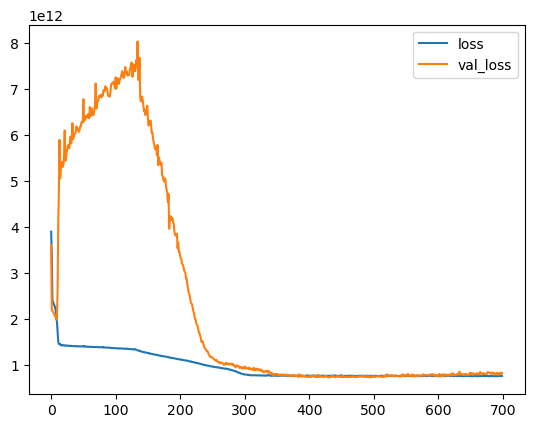

In [46]:
loss.plot()

In [47]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

96/96 [==============================] - 0s 568us/step


In [48]:
mse_train = mean_squared_error(y_train, train_predictions)

mse_test = mean_squared_error(y_test, test_predictions)

print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

MSE (Train): 755262249827.7554
MSE (Test): 826351407261.5046


In [49]:
mae_train= mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)

print(f'MAE (Train): {mae_train}')
print(f'MAE (Test): {mae_test}')

MAE (Train): 385885.8091669741
MAE (Test): 386930.6654713115


In [56]:
r_2_train = r2_score(y_train, train_predictions)
r_2_test = r2_score(y_test, test_predictions)

print(f'r2 (Train): {r_2_train}')
print(f'r2 (Test): {r_2_test}')

r2 (Train): 0.7024552032614366
r2 (Test): 0.6418724522150909


In [50]:
newHouse2 = df.drop("Price (£)",axis=1).iloc[324]

In [51]:
newHouse2

Bedrooms                       2
Bathrooms                      1
Size                         545
Luxury_Score                 1.0
Property Type_Apartment    False
Property Type_Flat          True
Name: 979, dtype: object

In [52]:
newHouse2 = scaler.transform(newHouse2.values.reshape(-1,6))

In [53]:
forecastedData = model.predict(newHouse2)

1/1 [==============================] - 0s 13ms/step


In [54]:
print("actual data of [2]  ", df["Price (£)"].iloc[324] )
print("forecasted data of [2] ",forecastedData)

actual data of [2]   350000
forecasted data of [2]  [[356009.16]]
